<a href="https://colab.research.google.com/github/umleeho1/AI_learning/blob/main/TABA_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning
- 강의 : 박준

<목차>
1. 인공지능과 머신러닝, 딥러닝
2. 훈련세트와 데이터세트
3. 데이터전처리(numpy, scikit-learn)
4. 회귀(Regression)
  - KNN 회귀(K-최근접 이웃 회귀, K-Nearest Neighborhood Regression)
  - 선형회귀(Linear Regression)
  - 다항회귀(Polynomial Regression)
5. 분류(Classification)
  - KNN 분류(K-최근접 이웃 분류, K-Nearest Neighborhood Classification)
   - 로지스틱 회귀(Logistic Regression)
6. 신경망(Neural Network, MLP)

# 1. 인공지능과 머신러닝, 딥러닝
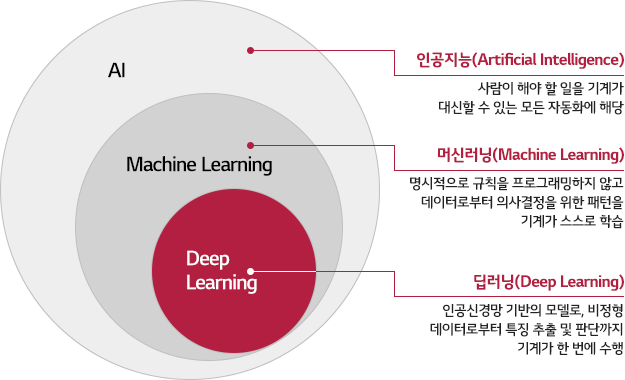
## 인공지능(Artificial Intelligence)
- 사람처럼 학습하고 추론할 수 잇는 지능을 가진 시스템을 만드는 기술
- 약인공지능(Weak AI): 특정 분야에서 사람의 일을 도와주는 보조 기능 격의 인공지능 (ex. 음성비서, 자율주행자동차, 음악추천, 기계번역, 알파고)
- 강인공지능(Strong AI): 사람과 구별하기 어려운 지능을 가진 컴퓨터 시스템
## 머신러닝(Machine Learning)
- 일일히 프로그래밍 하지 않아도 자동으로 데이터에서 규칙을 학습하는 알고리즘을 연구하는 분야
- **통계학**에서 유래된 머신러닝 알고리즘이 많음.
- 대표 라이브러리: Scikit-learn
</br>

## 딥러닝(Deep Learning)
- 머신러닝 알고리즘 중 인공신경망(Artificial Neural Network, ANN)을 기반으로 한 방법을 통칭하여 딥러닝(Deep Learning)이라고 부름
- 대표 라이브러리: Tensorflow, Pytorch

## Introduction (분류 맛보기)
- 도미(bream)🐟의 길이(length)와 무게(weight)를 기준으로 생선 종류를 자동으로 분류
- 데이터셋: https://www.kaggle.com/aungpyaeap/fish-market
<br>
- 매뉴얼 : "생선 길이가 30cm 이상이면 도미로 분류"<br>
  -> 그치만 30cm보다 큰 생선을 무조건 도미라고 할 수 있을까?🤔<br>
  -> 더 세밀한 기준을 만들수는 있겠지만, 그걸로 수 많은 생선 종류를 다 구분할 수 있을까?<br>
  => **머신러닝에게 너가 알아서 구별하라고 해보자:!**

In [ ]:
# 생선 분류 문제
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

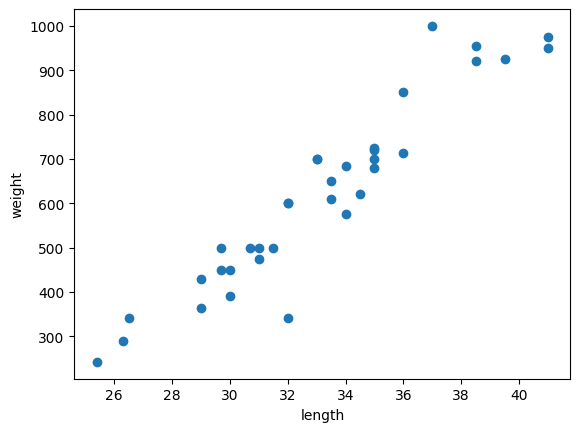

In [ ]:
# 도미 데이터 시각화
import matplotlib.pyplot as plt       # matplotlib의 pyplot 함수를 plt로 줄여서 사용할래여

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')                  # x축: 길이
plt.ylabel('weight')                  # y축: 무게
plt.show()

In [ ]:
# 빙어 데이터 준비
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

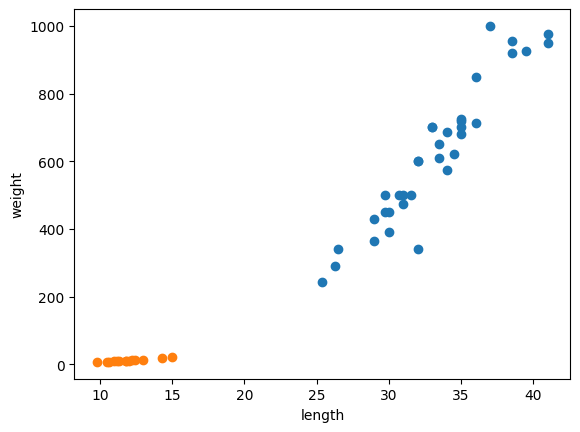

In [ ]:
# 도미 & 빙어 데이터 시각화
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

length, weight 두 데이터를 받아온 후 **(n번째 생선의 length, n번째 생선의 weight)** 형식으로 만들어주려고 함</br>
<br>
`[[l, w] for l, w in zip(length, weight)`
- zip(length, weight): length 리스트와 weight 리스트에서 원소를 순서대로 하나씩 꺼내서 l, w 변수에 담아 for문 내부로 보냄
- 파이썬은 위와 같은 코드를 통해 [l, w]를 원소로 가지는 새로운 리스트를 생성할 수 있음
- zip은 당!연!히! length, weight의 길이가 서로 같아야 함
  - `(len(length) == len(weight)) == True`
- 결과: `fish_data = [[length[0], weight[0]], [length[1], weight[1]], ... ]`

In [ ]:
length = bream_length + smelt_length      # 두 개의 리스트를 이어붙인다!
weight = bream_weight + smelt_weight      # 이것도 이어붙이기! (단, length, weight가 pair로 들어가는 만큼, 순서가 중요함.)

fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
print(len(bream_length))
print(len(smelt_length))
print(len(fish_data))

35
14
49


`fish_target = [1] * len(bream_length) + [0] * len(smelt_length)`<br>
- 타겟 데이터(target) : 머신러닝, 딥러닝에서 **정답** 데이터를 의미
  - Ground Truth 라고도 불림
- 리스트 연산자 `*`: 해당 리스트 요소가 `len(bream_length)`개 만큼 담긴 새로운 리스트 생성

In [ ]:
# 정답 만들기 (도미=1, 빙어)
fish_target = [1] * len(bream_length) + [0] * len(smelt_length)
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### K-Nearest Neighborhood Classifier(K-최근접 이웃 분류)
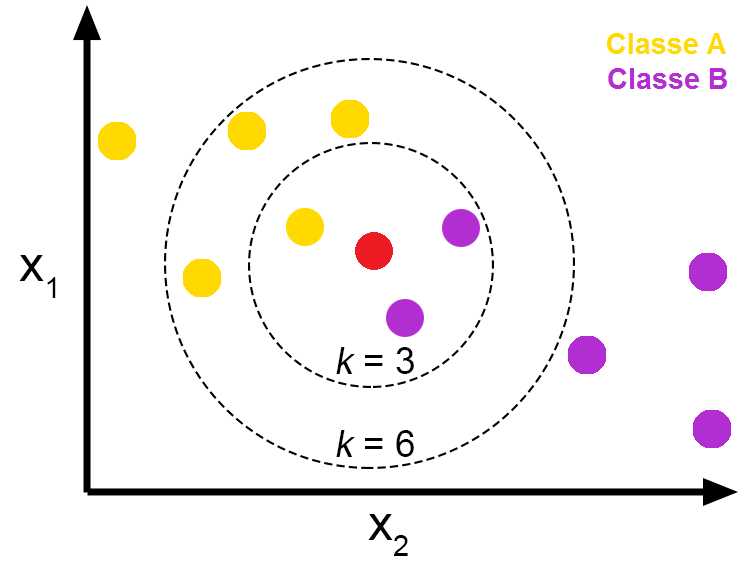

해당 데이터와 거리(distance)가 가장 가까운 K개의 데이터를 기반으로 클래스를 예측하는 알고리즘

`kn = KNeighborsClassifier()`
- 머신러닝 모델 구조를 선언함
- 객체지향프로그래밍에서는 이렇게 클래스 오브젝트를 선언하는 방식으로 모델을 정의 및 사용
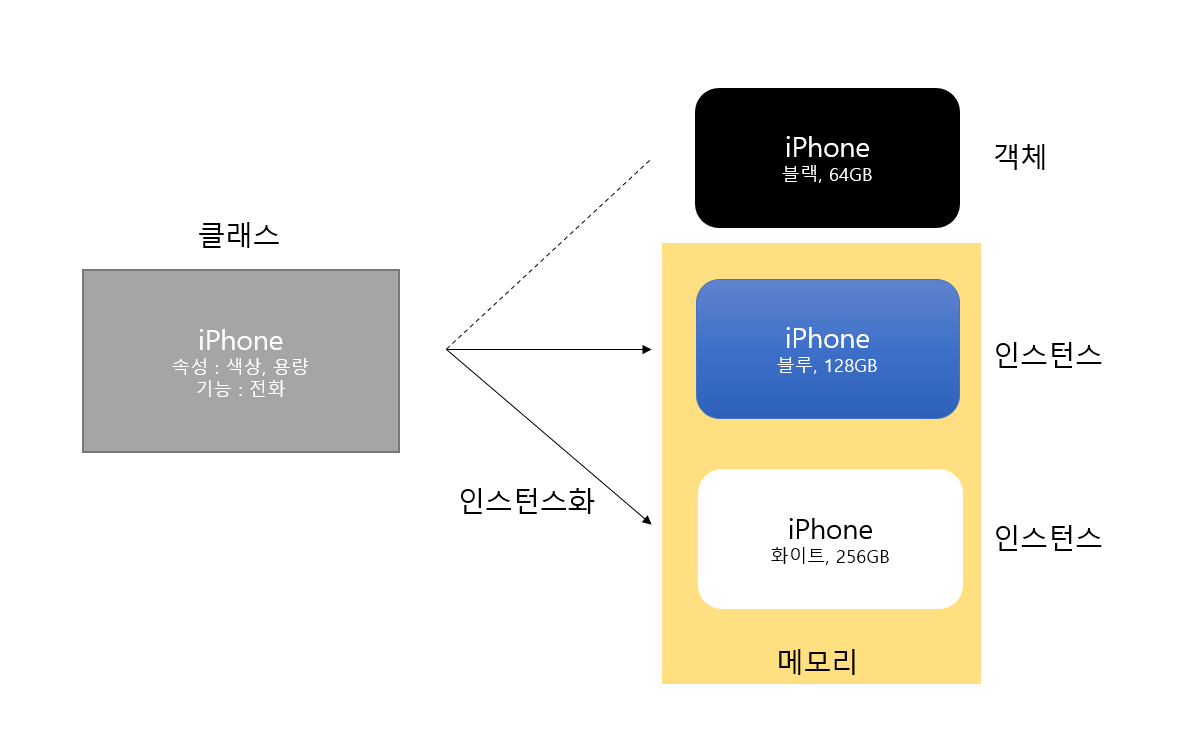


`kn.fit(X, y)`
- X: train data
- y: target data
- 머신러닝 모델을 학습하는 메소드
- pytorch에서는 train(), tensorflow는 fit() 등 여러 라이브러리에서 학습 메소드가 있음

`kn.score(X, y)`
- 학습한 머신러닝 모델의 성능을 검증
- 모델에게 X 데이터를 입력값으로 넣어준 후 나온 예측 결과를 y와 비교해 정확도를 [0.0, 1.0] 사이 실수로 나타냄
- 이런 성능 평가지표를 **Accuracy(정확도)**라고 함

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()         # 클래스 오브젝트 선언
kn.fit(fish_data, fish_target)      # 학습(fit)
kn.score(fish_data, fish_target)    # k-nearest neighborhood 알고리즘의 성능(정확도)

1.0

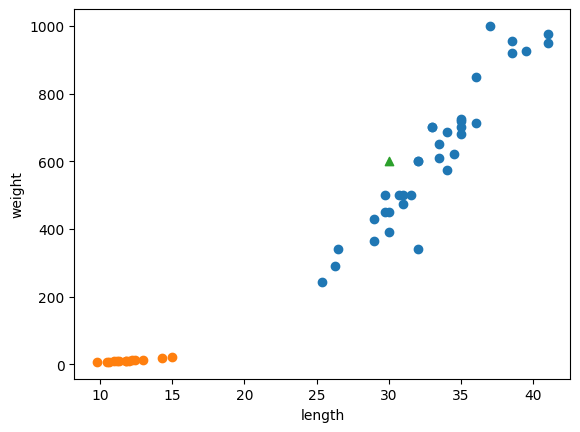

In [ ]:
# 새로운 데이터로 학습 결과 확인
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker="^")              # 사람은 바로 구별할 수 있음 (=> 데이터 상, 요건 도미다!)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 임의의 데이터를 넣고 결과 확인
print("length=30, weight=600 테스트 데이터의 예측 결과: ", kn.predict([[30, 600]]))

length=30, weight=600 테스트 데이터의 예측 결과:  [1]


k-nearest 알고리즘은 학습에 사용된 모든 X, y를 전부 모델에서 기억하고 있어야 함.
(`kn._fit_X, kn._fit_y`에서 확인 가능)<br>
따라서 KNN은 데이터가 너무 많은 경우에는 사용하기 어려우며, 직선거리 계산에도 많은 시간이 필요.


In [ ]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


## 파라미터와 하이퍼파라미터
- **파라미터(Parameter)**: 인공지능 모델이 가진 학습가중치를 의미 => 인위적 변경을 거의 하지 않음.
- **하이퍼파라미터(Hyper-parameter)**: 인공지능 모델을 학습하기 위해 설정하는 인위적인 값들. configuration setting 값들을 의미<br>
  => 어떤 것이 최적인지 모르므로 튜닝이 필요함(Hyper-parameter Tuning)

- K-Nearest Neighborhood 알고리즘의 하이퍼파라미터인 n_neighbors를 변경 해 보겠습니다!
- 우리는 35개의 도미(bream)데이터와 19개의 빙어(smelt) 데이터를 가지고 있어요.<br> => 이런 상태를 데이터 수에 **편향(bias)**이 존재한다고 합니다.
- 편향이 있는 데이터셋은 많은 문제를 발생시키지만, 슬프게도 Real world의 데이터셋은 편향된 경우가 아주아주 많아요.🥲
- 이런 경우, 더더더더더욱 하이퍼파라미터 설정도 중요한데, 아래의 예시에서는 k값을 49로 설정 해보겠습니다.


- n_neighbors가 49라면 도미 데이터를 모두 참조하고도 남을 크기!
- 만약 새로운 빙어(smelt) 데이터가 있다고 쳐봅시다. 그러면 모델은 아래의 과정을 거쳐 해당 빙어 데이터의 클래스를 prediction하게 됩니다.

1. 새로 들어온 빙어 데이터 주변에 19개의 학습 빙어 데이터가 있음을 확인합니다.
2. 그런데, 49개를 참고하기로 했으므로, 나머지 30개를 물색해봅니다. 남은 학습데이터가 도미 데이터 밖에 없네요...
3. 즉, 최종 계산 결과 빙어 19개, 도미 30개가 최근접 이웃으로 참조되었으므로 새로운 빙어 데이터는 슬프게도 도미가 돼 버렸습니다..🤣

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)   # 보통 n_neighbors를 k 라고 부름!
kn49.fit(fish_data, fish_target)
print("정확도 : ", kn49.score(fish_data, fish_target))        # 정확도가 떨어졌습니다 ㅠㅠㅜㅠㅜㅜㅠ

정확도 :  0.7142857142857143


In [ ]:
# 정확하게 도미놈들만 맞췄네요.
print(35/49)        # 도미데이터수/전체데이터수

0.7142857142857143


# 2. 훈련세트와 테스트세트

## 지도학습과 비지도학습
- 지도 학습(Supervised Learning): 정답데이터(target)이 주어지고 이를 통해 학습
- 비지도 학습(Unsupervised Learning): 정답데이터가 주어지지 않고 학습<br>
  => 요즘 딥러닝 계열에서는 Self-supervised learning으로 많이 사용

## 데이터
- 입력(input): `X` 모델에 입력되는 데이터
- 타깃(target): `y` 모델이 예측해야하는 값의 정답
- 특성(feature)
  - 위의 예시에서는 입력값을 구성하는 '길이(length)', '무게(weight)'
  - 인공지능 모델 학습을 위해 사용되는 데이터의 중요한 특징
  

- Feature Engineering(특성공학)
  - 데이터들에는 수 많은 특징들이 있지만, 인공지능 모델을 학습하기 위해서는 **중!요!한!** 특징만 뽑아내서 사용해야해요.
  - 주로 머신러닝 모델의 경우는 `[length, weight, weather, humidity, ...]` 등, feature를 직접 선정해서 모델의 입력값으로 만들어줍니다. (이번 예시에선 시각화를 용이하게 하기 위해 feature 2개만 사용했어욤)<br>
    => **Hand-craft feature**
  - 딥러닝 모델의 입력 값은 대개 **이미지, 자연어(텍스트), 연속된 신호값**이라서 이렇게 사람이 직접 중요한걸 찾아주기가 어려워요. 그래서 CNN등의 네트워크를 사용해서 특징을 자동으로 추출한답니다. (이건 내일 배워여)

## 훈련세트와 테스트세트
- 훈련세트(train set): 학습에 직접적으로 사용되는 데이터셋
- 검증세트(valid set): 학습 중간에 일반화 성능 평가를 위해 사용되는 데이터셋
- 테스트세트(test set): 학습이 끝난 이후에 모델 성능 평가를 위해 사용되는 데이터셋<br>
  => 테스트세트는 학습과정에서 절대 직접 활용되면 안됩니다. 테스트세트의 데이터가 훈련세트에 직간접적으로 혼합되어 성능평가를 혼동시키는 것을 데이터 오염(Data Contamination)이라고 해요.

**훈련세트랑 테스트세트는 어떻게 만들어여?🤨**
- AIHub나 주로 잘 정제된 데이터들은 train/test 정도는 나눠져있습니당
- 근데 안나눠져 있으면 내가 직접 나눠야해요.😖 => 주로 비율은
- 제일 많이 쓰는 방법은 scikit-learn에서 `train_test_split()` 함수를 쓰는 것!
- 아니면 인덱스 기준으로 나눠도 됩니당


In [ ]:
# 도미랑 빙어 데이터를 합친 데이터셋
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [ ]:
# 총 49개의 샘플(sample) 중 35개를 훈련세트, 14개를 테스트세트로 사용 (우선 직접 인덱싱 해봅시다)
# random sampling
train_input  = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
# 모델 불러오기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_target)
print("Train 데이터셋에 대한 정확도(Train Accuracy): ", kn.score(train_input, train_target))
print("Test 데이터셋에 대한 정확도(Test Accuracy): ", kn.score(test_input, test_target))

Train 데이터셋에 대한 정확도(Train Accuracy):  1.0
Test 데이터셋에 대한 정확도(Test Accuracy):  0.0


😬 헉! 학습 데이터에 대해서는 정확도가 100%인데, 테스트 데이터에 대해서는 정확도가 0이네요..!<br>
왜 이럴까요?? 문제는 **샘플링편향(sampling bias)**에 있습니다!
<br><br>
방금 `train_input  = fish_data[:35]`으로 앞 부분의 35개만 학습 데이터로 가져왔죠?<br>
앞부분에는 도미 데이터만 가득 있어요.<br>
그래서 도미는 잘 학습 됐지만 빙어데이터는 전부 테스트세트로 지정되어서 전혀 학습되지 않은거죠.<br>
이렇게 train/valid/test를 나눌때는 데이터 속 **클래스의 비율**을 잘 고려해야해요.<br>
비율을 잘 고려해서 뽑는 방법은 두 가지가 대표적입니다.<br>

1. `sklearn.model_selection.train_test_split()` 사용
2. `np.shuffle()`로 직접 섞어주기

우리는 첫 번째 방법을 사용해볼겁니당

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`
- arrays: 분할할 데이터셋(numpy array) (X, y 둘 다)
- test_size: 테스트셋으로 사용할 비율 (0.0~1.0)
- train_size: 학습셋으로 사용할 비율 (test 쓰면 알아서 설정 됨)
- random_state: 랜덤 씨드
- shuffle: 셔플링 할건지 여부
- **stratify**: 데이터를 나눌때 클래스 비율을 고려할지 설정. target array를 넣으면 클래스별 빈도수에 맞춰서 비율을 조정해줌.

In [ ]:
from sklearn.model_selection import train_test_split
# test_size는 앞선 예시의 test 데이터셋과 개수를 동일하게 하기 위해 설정한겁니다. 이렇게까지 세세히 설정 안하고 그냥 0.3으로 하셔도 됩니다.
X_train, X_test, y_train, y_test = train_test_split(fish_data, fish_target, test_size=0.28, random_state=1024, shuffle=True, stratify=fish_target)

In [ ]:
print(f"학습데이터 수: {len(X_train)}, 테스트데이터 수: {len(X_test)}")

학습데이터 수: 35, 테스트데이터 수: 14


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn = kn.fit(X_train, y_train)
print("Train 데이터셋에 대한 정확도(Train Accuracy): ", kn.score(X_train, y_train))
print("Test 데이터셋에 대한 정확도(Test Accuracy): ", kn.score(X_test, y_test))

Train 데이터셋에 대한 정확도(Train Accuracy):  1.0
Test 데이터셋에 대한 정확도(Test Accuracy):  1.0


In [ ]:
train_input, train_target, test_input, test_target = X_train, y_train, X_test, y_test

# 3. 데이터 전처리(Data Preprocessing)
- 데이터 전처리: 모델에 훈련 데이터를 주입하기 전에 가공하는 단계. 주로 cpu로 처리한다.

## 넘파이(numpy)

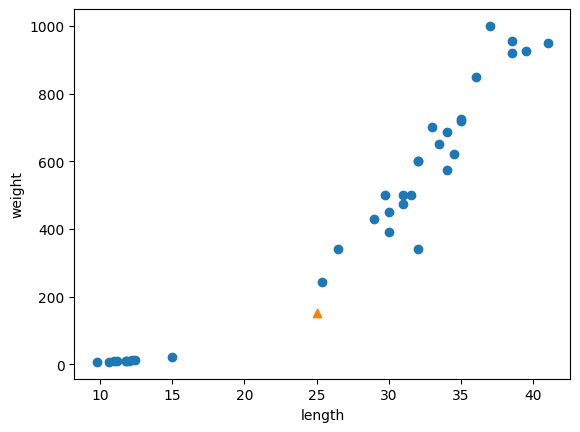

TypeError: ignored

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14
X_train, X_test, y_train, y_test = train_test_split(fish_data, fish_target, test_size=0.28,
                                                    random_state=1024, shuffle=True, stratify=fish_target)

X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(25, 150, marker='^')        # 새로운 데이터셋 (length=25, weight=150)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
# 넘파이 배열로 변환
import numpy as np

train_input, train_target, test_input, test_target = np.array(train_input), np.array(train_target), np.array(test_input), np.array(test_target)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
train_input.shape[0]

35

In [ ]:
train_input

array([[  30. ,  450. ],
       [  38.5,  920. ],
       [  11.8,   10. ],
       [  38.5,  955. ],
       [  32. ,  600. ],
       [  11.2,    9.8],
       [  12. ,    9.8],
       [  32. ,  340. ],
       [  31.5,  500. ],
       [  37. , 1000. ],
       [  34. ,  685. ],
       [  33.5,  650. ],
       [  12.2,   12.2],
       [  31. ,  475. ],
       [  33. ,  700. ],
       [  34.5,  620. ],
       [  30. ,  390. ],
       [  25.4,  242. ],
       [  10.6,    7. ],
       [  29.7,  500. ],
       [  34. ,  575. ],
       [  15. ,   19.9],
       [  41. ,  950. ],
       [  32. ,  600. ],
       [  35. ,  725. ],
       [  26.5,  340. ],
       [  11.8,    9.9],
       [   9.8,    6.7],
       [  31. ,  500. ],
       [  11. ,    9.7],
       [  12.4,   13.4],
       [  29. ,  430. ],
       [  36. ,  850. ],
       [  35. ,  720. ],
       [  39.5,  925. ]])

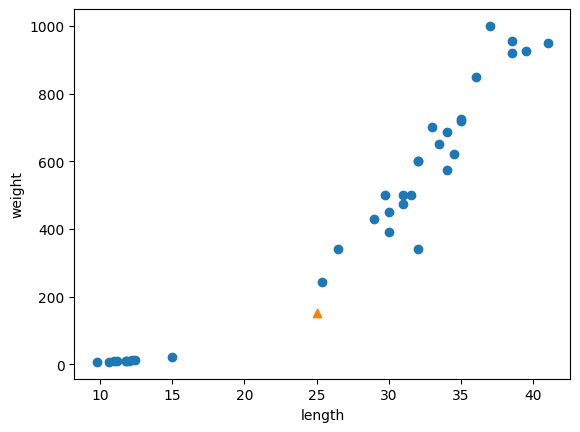

In [ ]:
# 새로운 데이터
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])         # 이런 인덱싱은 넘파이에서만!
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## 정규화(Normalization)와 표준화(Standarization)
- 거리기반 알고리즘에서 특히 중요!
- 단위의 차이에서 오는 오류를 제거
<br><br>
위의 `[25, 150]` 데이터를 분류해보자!

In [ ]:
print("새로운 length=25, weight=150 데이터의 예측 결과: ", kn.predict([[25,150]]))

새로운 length=25, weight=150 데이터의 예측 결과:  [0]


그런데 산점도 상으로는 도미 데이터에 훨씬 가까워 보이는데? 왜 빙어(`[0]`)라고 예측한걸까?

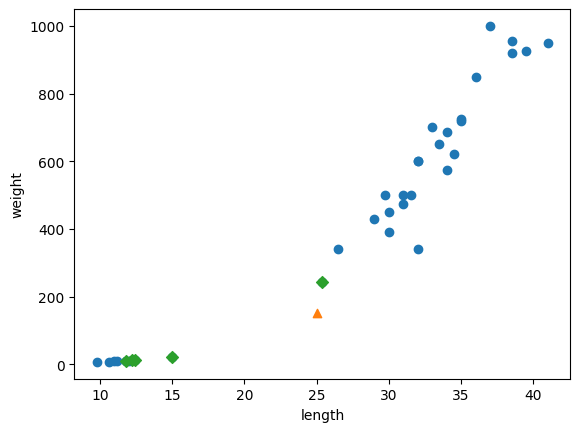

In [ ]:
# 디폴트 k=5, [25,150]과 최근접 이웃들의 거리와 데이터 인덱스를 얻어서 확인해보자! (즉, 새로운 데이터 예측의 단서)
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

초록색들이 세모([25,150])의 예측값 단서들인데...<br>
최근접 k개의 데이터를 바탕으로 추론하는거 아니었나..?<br>
거리가 훨씬 가까워보이는 데이터들도 있는데 왜 빙어로 추측하지?
<br>
=> x축과 y축의 범위 때문!<br>
<br>
- x축 값의 범위(길이: 10~40)
- y축 값의 범위(무게: 0~1000)
- y축의 값 범위가 훨씬 크기 때문에 산점도 상에서 y축으로 아주 조금만 벌어져도 거리 계산 상 매우 큰 값으로 계산됨.
<br><br>
아래는 x축과 y축의 범위를 모두 동일하게 0~1000으로 맞췄을 때의 산점도


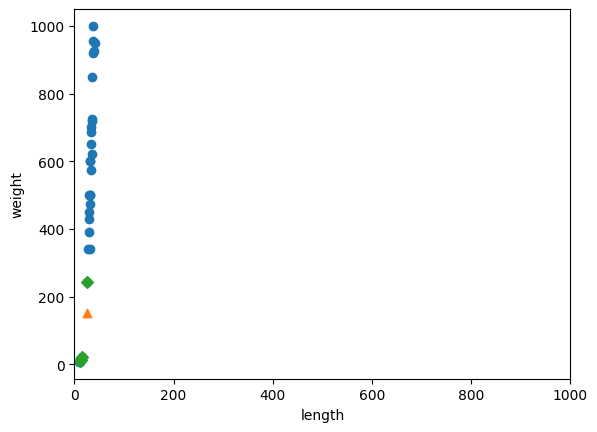

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))           # x축의 범위(limit)를 0~1000 사이로 맞춤
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

x축과 y축을 둘 다 0~1000 사이로 맞춰본 결과 x축은 데이터의 `스케일(scale)`이 훨씬 작다!<br>
이러면 모델이 x축을 의미있는 feature로 받아들이지 않을 수도 있음 => y축만 예측의 고려대상이 됨.<br>
따라서 이런 경우 두 변수의 스케일을 맞춰 주어야 함! => Scaling<br>
가장 많이 사용하는 스케일링 방법은 두 가지!

1. Normalization(정규화)
  - $\frac{x-min}{max-min}$
  - 값의 범위를 [0,1] 사이 실수로 옮김
2. Standardization(표준화)
  - 표준편차와 평균을 사용해서 값의 범위를 정규분포 내로 옮김
  - $\frac{x-\mu}{\sigma}$

In [ ]:
# Standardization
import numpy as np
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

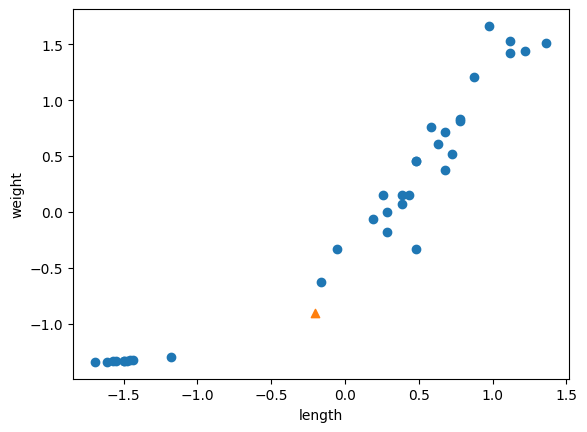

In [ ]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

train_scaled = (X_train - mean) / std
new = ([25,150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 산점도의 x,y축 범위가 -1.5~1.5 사이로 바뀌었다!

In [ ]:
print(mean, std)

[ 27.06857143 450.01142857] [ 10.21365393 330.28803341]


In [ ]:
train_input.shape

(35, 2)

axis는 뭘 기준으로 하는가?😐<br>
없애려고 하는 차원 기준으로 생각하자!<br>
리스트를 numpy array로 바꾸면 `train_input.shape` 처럼 행렬,텐서 형태의 shape을 확인 가능<br>
여기서 가장 첫번째 인덱스부터 0,1,2,... 로 세어감<br>
우리는 연산을 통해 (2,)의 배열을 만들고 싶으므로(각 특성 종류 별 평균,분산) axis=0으로 지정

In [ ]:
print("평균: ", mean)
print("표준편차: ", std)

평균:  [ 27.06857143 450.01142857]
표준편차:  [ 10.21365393 330.28803341]


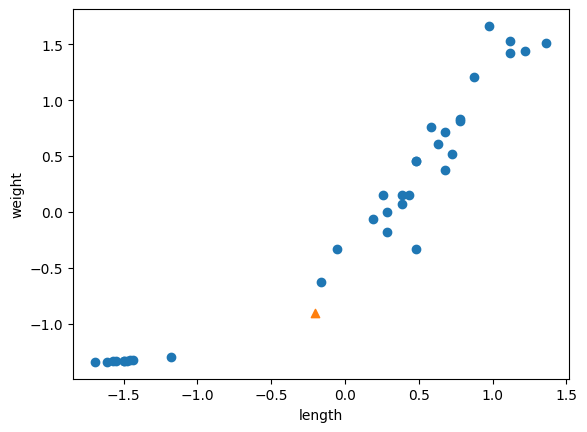

In [ ]:
train_scaled = (train_input - mean) / std
new = ([25,150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 산점도의 x,y축 범위가 -1.5~1.5 사이로 바뀌었다!

이제 스케일을 맞춘 데이터셋으로 다시 학습해보자!

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

테스트 데이터셋도 반드시 함께 스케일링 해 줘야 함.<br>
주의할 점은 반드시 train set의 스케일(mean, std)로 스케일링 해야한다!

In [ ]:
test_scaled = (test_input-mean) / std

print(kn.score(test_scaled, test_target))

1.0


홀리몰리 이제 똑똑하게 잘 분류하네용

In [ ]:
print(kn.predict([new]))

[1]


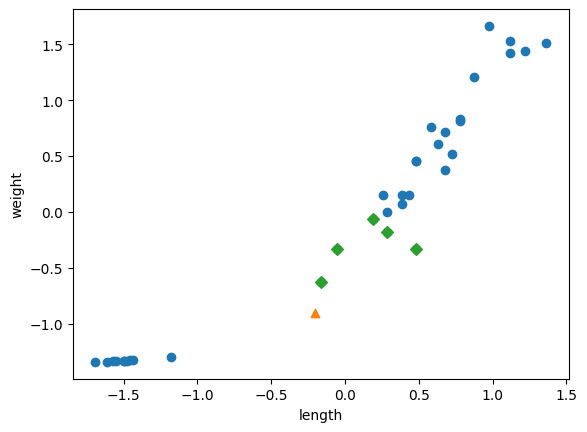

In [ ]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 4. 회귀(Regression)
- 회귀(Regression): 입력데이터로부터 어떠한 숫자(주로 실수)를 예측하는 것<br>
  (ex. 내년도 경제성장률 예측, 배달 도착시간 예측 등)

- 알고리즘
  1. **K-최근접 회귀**
  2. **선형회귀(Linear Regression)**
  3. **다항회귀(Polynomial Regression)**

## 1) KNN (K-Nearest Neighborhood Regression)
  - 분류랑 똑같음..! 예측하려는 샘플에 가장 가까운 샘플 k개를 선택해 최종 예측값에 반영
  - 회귀이기 때문에 **최근접 샘플 k개의 target(=y)값 평균**으로 구함!
<br><br>
이번엔 소주랑 찰떡궁합 존맛 농어로 해봅시다🥴

In [ ]:
# 농어의 길이와 무게 데이터
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

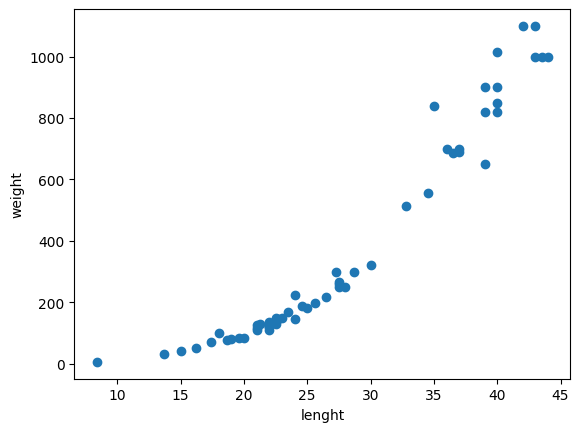

In [ ]:
# 농어 데이터 시각화
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

In [ ]:
# 훈련세트와 테스트세트로 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
train_input.shape

(42,)

In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### Metric (성능지표)
분류문제에서는 Accuracy를 사용(몇 개를 맞췄는가를 백분율로 표시)<br>
회귀에서는 그렇게 할 수 없으므로 다른 성능지표를 사용함<br><br>

1. **결정계수($R^2$)**
  - $R^2 = 1-\frac{(target-pred)^2의\ 합}{(target-mean\ of\ target)^2의\ 합}$
  - 예측이 target에 아주 가까워지면(모델의 성능이 좋다는 뜻) $R^2$는 1에 가까워지고 제대로 맞추지 못하면 0에 가까워짐.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))   # 결정계수

0.992809406101064


2. **MAE(Mean Absolute Error)**
  - $MAE = Mean(|target - pred|) = Mean(|y - \hat y|)$
  - 자매품: MSE(Mean Square Error)
    - $MSE = Mean((target - pred)^2) = Mean((y - \hat y)^2)$

In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)          # 평균적으로 19g 정도 target 값과 다르다!

19.157142857142862


### 과대적합(Overfitting)과 과소적합(Underfitting)
- 과대적합(Overfitting): train set의 예측성능(=>학습성능)보다 test set의 성능이 지나치게 낮을 때
  - train set에 지나치게 피팅되었다.
- 과소적합(Underfitting): train set의 예측성능이 test set의 성능보다 낮을 때
  - 일반적으로 train set에서의 성능이 test set에서의 성능보다 약간 좋은 수준이 이상적
  - train set에서의 성능이 너무 낮은 경우, 모델이 학습데이터에서 주요 특징을 제대로 학습하지 못했다는 증거가 될 수 있음
<br><br>

아래의 상황을 보면, 여기서는 train set에서의 성능이 test set에서의 성능보다 좋지 않은 것을 볼 수 있음<br>
=> "Underfitting" (사실.. 여기선 데이터셋의 양이 너무 적어서 일어난것이라고 합리적 추측이 가능합니다👀)

In [ ]:
# Train 결정계수
print(knr.score(train_input, train_target))

0.9698823289099254


In [ ]:
# Train MAE
train_prediction = knr.predict(train_input)
mae = mean_absolute_error(train_target, train_prediction)
print(mae)

35.76190476190476


In [ ]:
# 모델을 좀 더 국지적 패턴에 민감하도록 만들어보자(데이터셋이....적으니까...또르르..)

knr.n_neighbors = 3

knr.fit(train_input, train_target)
print("결정계수(train) : ", knr.score(train_input, train_target))
print("결정계수(test) : ", knr.score(test_input, test_target))

결정계수(train) :  0.9804899950518966
결정계수(test) :  0.9746459963987609


## 2) 선형회귀(Linear Regression)
- x와 y가 선형관계가 있어 보일 때 사용
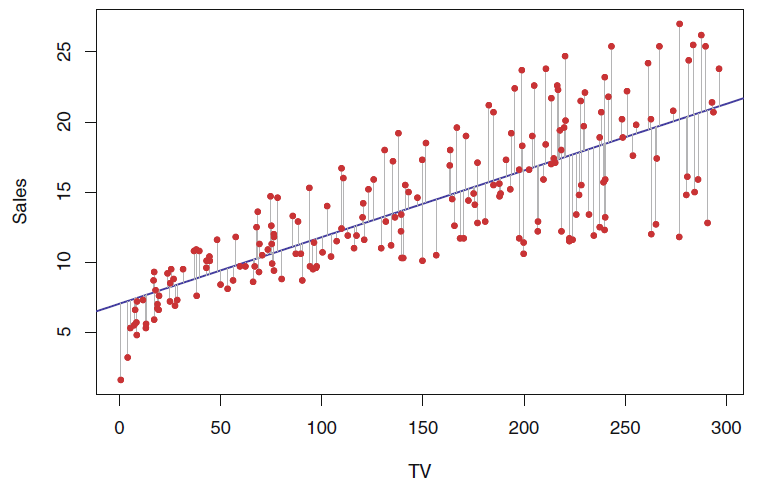
<br><br>
- KNN 알고리즘의 한계: 이상치에 취약하고 일반화 능력이 낮음

In [ ]:
# 농어의 길이와 무게 데이터
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 훈련세트와 테스트세트로 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

# 모델 세팅


(42, 1) (14, 1)


길이 50일 때 예측 무게 :  [1033.33333333]
길이 100일 때 예측 무게 :  [1033.33333333]



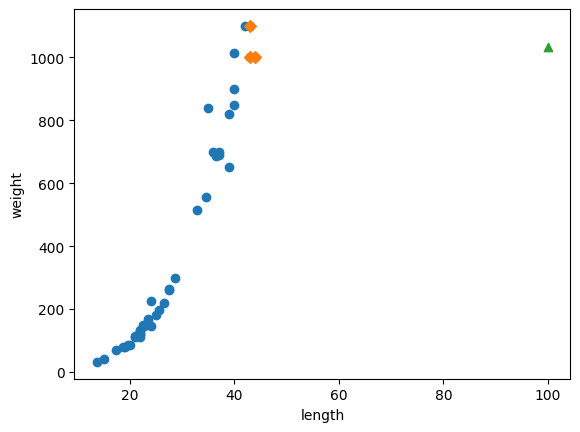

In [ ]:
# KNN 회귀 알고리즘의 한계
print("길이 50일 때 예측 무게 : ", knr.predict([[50]]))
print("길이 100일 때 예측 무게 : ", knr.predict([[100]]))
print()


distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

이런 식이면 농어의 길이가 아무리 길어져도 무게가 일정 이상 늘어나지 않음 => KNN 회귀의 한계!

선형회귀는 이렇게 주변 데이터와 비교하지 않고<br>
**현재 학습 데이터셋을 가장 잘 표현하는 직선($y=wx+b$)**을 찾는 훈련을 수행
<br>

기울기 $w$는 `lr.coef_`, bias $b$는 `lr.intercept_`에 저장<br>
=> 이 $w$와 $b$를 **모델 파라미터(model parameter)**라고 함!<br>
=> KNN은 모델 파라미터가 없는 사례기반 학습

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print("길이 50일 때 예측 무게 : ", lr.predict([[50]]))
print("길이 100일 때 예측 무게 : ", lr.predict([[100]]))

길이 50일 때 예측 무게 :  [1241.83860323]
길이 100일 때 예측 무게 :  [3192.69585141]


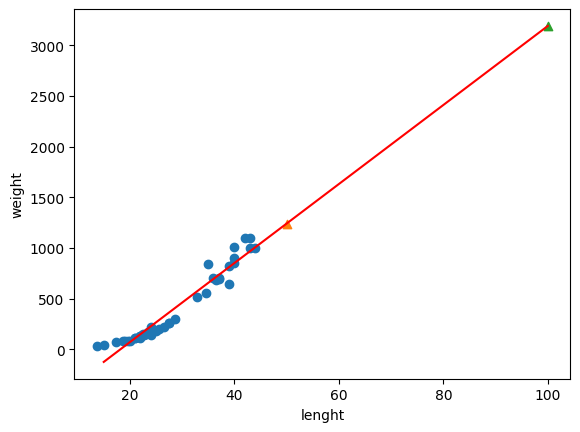

In [ ]:
# 그래프로 그려보자요
plt.scatter(train_input, train_target)

plt.plot([15, 100], [15*lr.coef_ + lr.intercept_, 100*lr.coef_ + lr.intercept_], color="r")
plt.scatter(50, lr.predict([[50]]), marker="^")
plt.scatter(100, lr.predict([[100]]), marker="^")
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


둘 다 전체적으로 높지 않음🤨

## 3) 다항회귀(Polynomial Regression)
$y=w_nx^n\ +\ ...+\ w_1x^1\ +\ b$
weight를 하나만 가지지 말고 n차항의 계수들을 예측하는 회귀<br>
=> 그래프가 곡선으로 변한다!

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

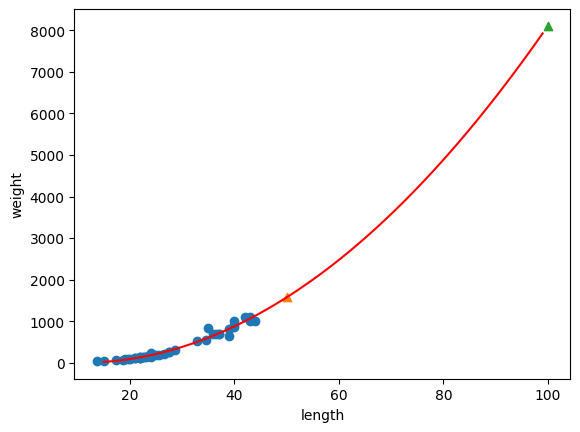

In [ ]:
# 시각화
point = np.arange(15, 100)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_, color="r")
plt.scatter(50, lr.predict([[50**2,50]]), marker="^")
plt.scatter(100, lr.predict([[100**2,100]]), marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 5. 분류
예측하려는 데이터의 클래스를 구분하는 작업
- 종류
  1. **이진분류(Binary Classification)**: 1 or 0 (맞다 or 아니다)로 분류, 즉 클래스가 2개인 경우
  2. **다중분류(Multi-class Classification)**: 클래스가 3개 이상인 경우
<br>

- 알고리즘
  1. **K-최근접 이웃 분류** -> (introduction)
  2. **로지스틱 회귀(Logistic Regression)**

여기서는 numpy에 이어 또 다른 데이터 사이언스 라이브러리 `pandas`를 사용해보겠습니다!
<br><br>

## pandas 라이브러리
- `pandas`
  - 데이터프레임(dataframe)을 다루는 파이썬의 라이브러리
  - 데이터프레임(dataframe): 2차원 표 형식의 주요 데이터 구조
    - 열(column)과 행(row)으로 이루어짐
  - 통계와 그래프를 위한 메소드(method)를 풍부하게 제공
  - numpy와 상호변환이 쉽고 scikit-learn과도 잘 호환됨

  - 주요 메소드
    - `pd.read_csv()`: 외부 csv 파일을 읽어서 프로그램에 올림
    - `Dataframe.head()`: 데이터프레임의 처음 5개의 행을 출력
    - `pd.unique()`: 고유값을 추출(중복제거)
    - `Dataframe.columns`: 데이터프레임의 컬럼 이름을 담은 리스트 반환
    - `Dataframe.columns.difference([column name])`: 해당 컬럼 이름을 제외한 후 남은 컬럼 이름을 반환


In [ ]:
import pandas as pd

fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()       # 처음 5개의 행 추출

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print("물고기 종류(Species): ", pd.unique(fish['Species']))

물고기 종류(Species):  ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[fish.columns.difference(['Species'])]
print(fish_input[:5])
print(fish_input.shape)

   Diagonal   Height  Length  Weight   Width
0      30.0  11.5200    25.4   242.0  4.0200
1      31.2  12.4800    26.3   290.0  4.3056
2      31.1  12.3778    26.5   340.0  4.6961
3      33.5  12.7300    29.0   363.0  4.4555
4      34.0  12.4440    29.0   430.0  5.1340
(159, 5)


In [ ]:
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])
print(fish_target.shape)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']
(159,)


In [ ]:
# 훈련셋 테스트셋 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [ ]:
print(train_input[:5])
print(train_target[:5])

     Diagonal   Height  Length  Weight   Width
26       40.6  16.3618    35.0   720.0  6.0900
137      48.0   6.9600    45.0   500.0  4.8960
146      11.6   1.9720    10.5     7.5  1.1600
90       23.5   5.5225    22.0   110.0  3.9950
66       23.2   8.5376    20.7   140.0  3.2944
['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki']


KNN 처럼 여러 feature들이 있다면 반드시 스케일링(Scaling)을 해야 함<br>
<br>
- `sklearn.preprocessing.StandardScaler`: standardization을 자동으로 해주는 사이킷런 라이브러리

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 1) K-최근접 이웃 분류(KNN Classification)
- 이진분류에서는 1 or 0으로 타겟을 만들어서 사용했었음
- 다중분류에서는 클래스이름을 그대로 사용해도 사이킷런에서 인식(자동으로 알파벳 순으로 매겨짐)
  - `kn.classes_`
- `kn.predict_proba(x)`: 클래스 별 확률을 반환


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print("train set accuracy: ", kn.score(train_scaled, train_target))
print("test set accuracy: ", kn.score(test_scaled, test_target))

train set accuracy:  0.8907563025210085
test set accuracy:  0.85


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))    # 소숫점 네 번째 자리까지 표시

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[:5])
print(train_target[indexes])

[['Perch' 'Perch' 'Perch']
 ['Smelt' 'Smelt' 'Smelt']
 ['Pike' 'Pike' 'Pike']
 ['Roach' 'Perch' 'Perch']
 ['Perch' 'Perch' 'Roach']]


그치만 KNN을 사용했을때 표시하는 확률은 K개의 이웃 내에서의 확률임 = $\frac{\text{class_count}}{K}$
<br>위의 예시에서는 1/3, 2/3, 3/3 밖에 확률을 표시할 수 없음


## 2) 로지스틱 회귀(Logistic Regression)
이름은 회귀지만, 분류모델!<br>
선형 회귀와 동일하게 선형방정식을 학습
<br><br>
$y = w_1\cdot x_1 + w_2\cdot x_2 + w_3\cdot x_3 + w_4\cdot x_4 + w_5\cdot x_5$
<br>
- $x_1$: Weight
- $x_2$: Length
- $x_3$: Diagonal
- $x_4$: Height
- $x_5$: Width



### 이진분류(Binary Classification)

output $y$ 값에 **시그모이드 함수**를 적용해 "확률화"

- 시그모이드 함수(Sigmoid)(=Logistic Function)
  - $\phi=\frac{1}{1+exp(y)}$
  - 시그모이드의 입력값이 양수라면 0.5 이상의 실수로, 음수라면 0.5이하의 수로 변환
  - [0.0, 1.0] 사이의 실수로 값을 변환해주어 "확률화" 하는 역할을 가짐
  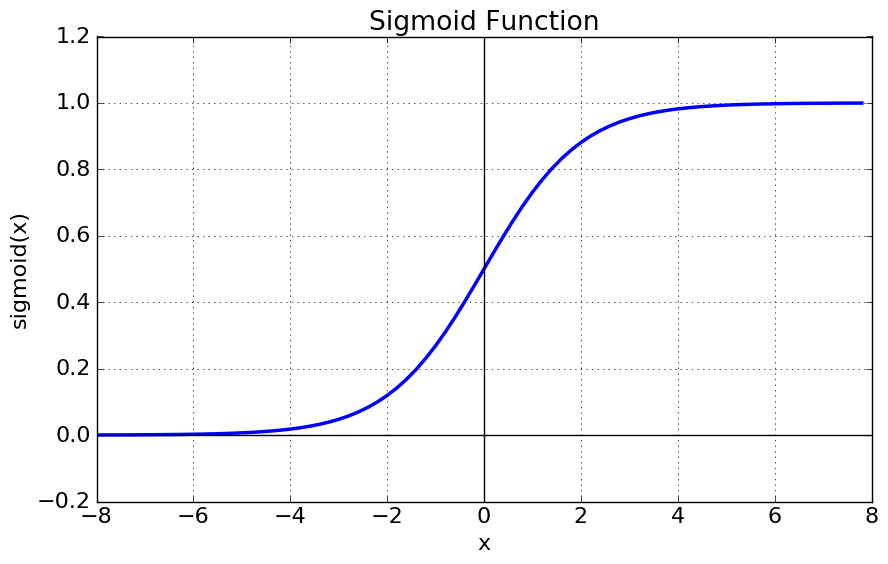

In [ ]:
# 이진 분류를 위해 클래스 2개만 추출 (도미, 빙어)
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
train_bream_smelt.shape

(33, 5)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
# 모델 파라미터
print(lr.coef_, lr.intercept_)

[[-0.66280298 -1.01290277 -0.57620209 -0.4037798  -0.73168947]] [-2.16155132]


$y = -0.662 \cdot (Weight)-1.01\cdot (Length)-0.576\cdot (Diagonal)-0.403\cdot (Height) -0.731\cdot (Width) -2.161$

In [ ]:
from scipy.special import expit
decisions = lr.decision_function(train_bream_smelt[:5])    # output y 값
print(expit(decisions))             # expit: 시그모이드 함수


# lr.predict_proba 결과의 두번째 열과 동일!

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

### 다중 분류(Multi-Class Classification)

- 주요 하이퍼파라미터
  - max_iter : 반복 횟수
  - C : Regularization를 제어하는 변수(penalty)

소프트맥스 함수(Softmax)로 확률화
- **소프트맥스 함수(Softmax)**
  - 하나의 출력값을 0~1사이로 압축하는 시그모이드와는 달리, 여러개의 출력값을 확률화(전체 합 1)
  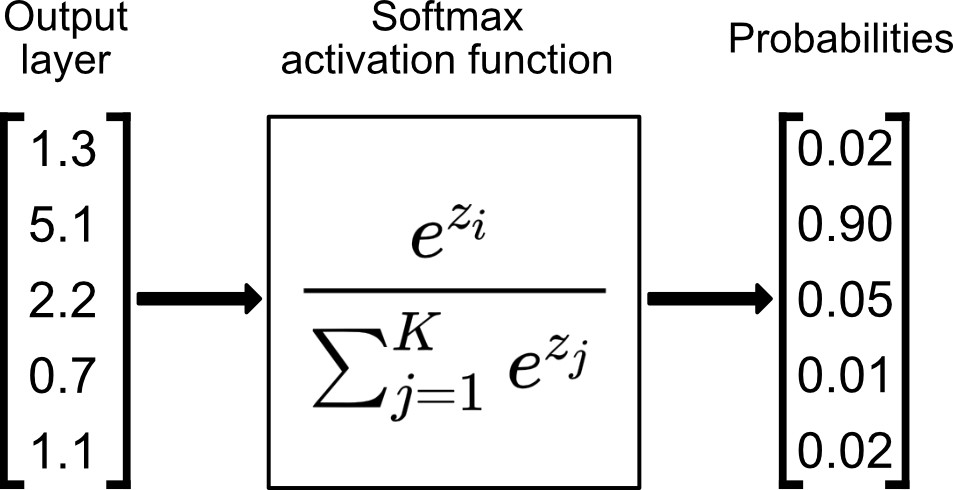

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)    # default: C=1, max_iter=100
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))
proba = lr.predict_proba(test_scaled[:5])
print()
print(lr.classes_)
print(np.round(proba, decimals=3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

# (클래수 개수=7, 특성(feature)=5)

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))
print()

from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 6. 인공신경망 (Neural Network, MLP)

In [ ]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 20557699.31it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 342465.81it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6075806.93it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5309141.13it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

<Axes: >

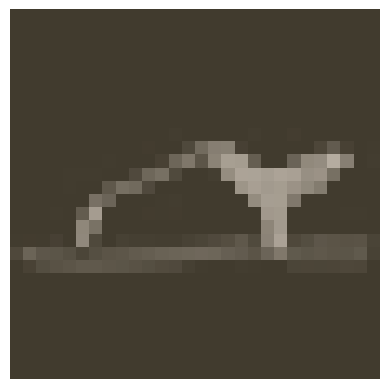

In [ ]:
image, label = next(iter(trainloader))
imshow(image[0,:])

In [ ]:
import torch.nn as nn

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)      # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [ ]:
import torch.optim as optim
import torch.nn.functional as F

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 50
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    model.train()
    for images, labels in trainloader:
        optimizer.zero_grad()

        log_ps = model(images)    # pred
        loss = criterion(log_ps, labels)    # pred, target
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
      # for 문이 끝나면 실행한다.

      # validation step
    test_loss = 0
    accuracy = 0

    model.eval()

    # Turn off gradients for validation, saves memory and computations
    # 자동 미분을 꺼서 pytorch가 쓸 떼 없는 짓을 안하게 한다. (어차피 test set에서 하는 작업이므로)
    with torch.no_grad():
        for images, labels in testloader:
            log_ps = model(images)
            test_loss += criterion(log_ps, labels)

            # 로그 확률에 지수 적용
            ps = torch.exp(log_ps)
            # topk는 k번째로 큰 숫자를 찾아내는 것이다.
            # dim=1 는 dimension을 의미한다.
            top_p, top_class = ps.topk(1, dim=1)
            # labels를 top_class와 똑같은 형태로 만든다음에, 얼마나 같은게 있는지 확인한다.
            equals = top_class == labels.view(*top_class.shape)
            # equals를 float으로 바꾸고 평균 정확도를 구한다.
            accuracy += torch.mean(equals.type(torch.FloatTensor))

    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

    print("Epoch: {}/{}.. ".format(e+1, epochs),
          "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
          "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/50..  Training Loss: 0.523..  Test Loss: 0.448..  Test Accuracy: 0.839
Epoch: 2/50..  Training Loss: 0.396..  Test Loss: 0.398..  Test Accuracy: 0.857
Epoch: 3/50..  Training Loss: 0.354..  Test Loss: 0.393..  Test Accuracy: 0.856
Epoch: 4/50..  Training Loss: 0.336..  Test Loss: 0.371..  Test Accuracy: 0.871
Epoch: 5/50..  Training Loss: 0.318..  Test Loss: 0.365..  Test Accuracy: 0.872
Epoch: 6/50..  Training Loss: 0.306..  Test Loss: 0.404..  Test Accuracy: 0.857
Epoch: 7/50..  Training Loss: 0.294..  Test Loss: 0.372..  Test Accuracy: 0.874
Epoch: 8/50..  Training Loss: 0.286..  Test Loss: 0.374..  Test Accuracy: 0.872
Epoch: 9/50..  Training Loss: 0.273..  Test Loss: 0.364..  Test Accuracy: 0.874
Epoch: 10/50..  Training Loss: 0.270..  Test Loss: 0.371..  Test Accuracy: 0.870
Epoch: 11/50..  Training Loss: 0.264..  Test Loss: 0.363..  Test Accuracy: 0.875
Epoch: 12/50..  Training Loss: 0.256..  Test Loss: 0.377..  Test Accuracy: 0.876
Epoch: 13/50..  Training Loss: 0.247.

In [ ]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

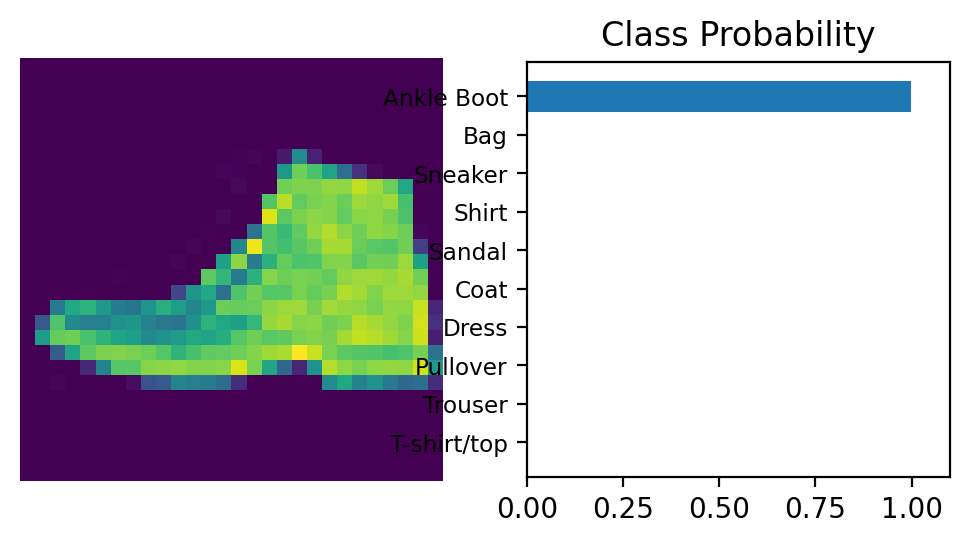

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
img = img.resize_(1, 784)
ps = torch.exp(model(img))
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

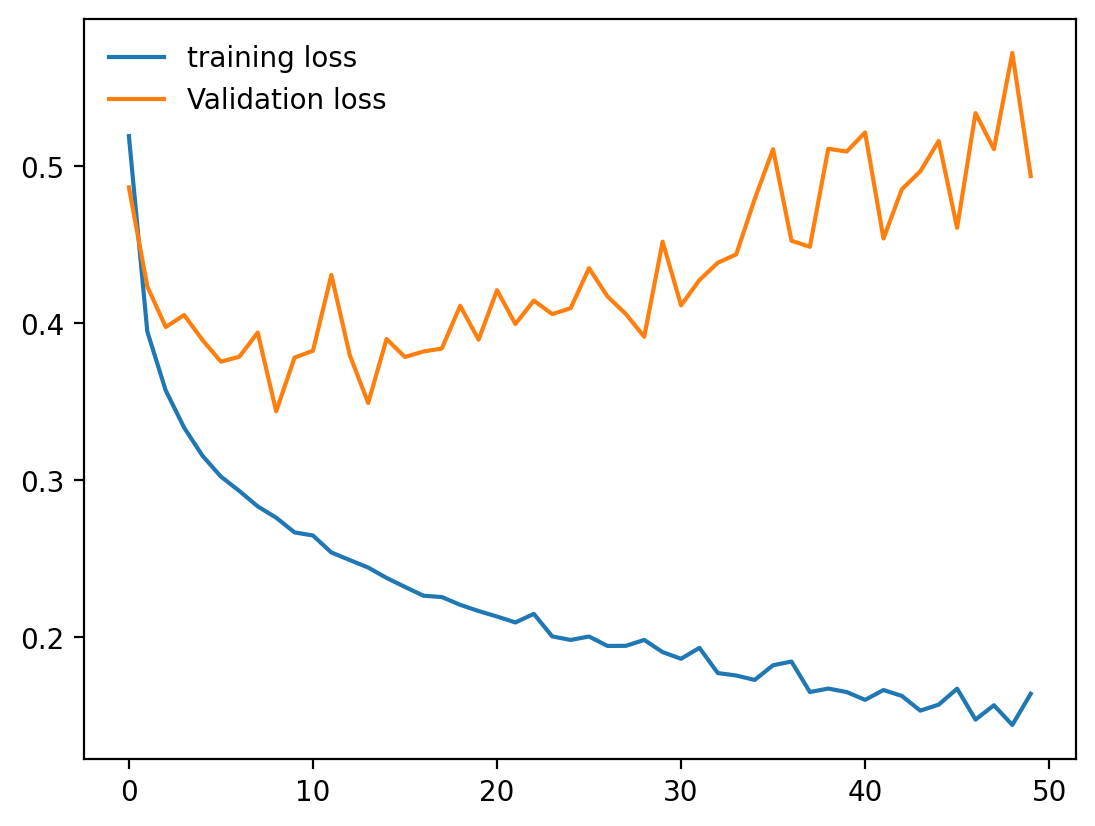

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)


In [ ]:
# Dropout 넣어서 수정해보자
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # 0.2정도를 무작위로 골라 dropout한다.
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = x.view(x.shape[0], -1)

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output은 dropout하면 안된다..
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [ ]:
# 다시학습...

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 50
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    else:
        test_loss = 0
        accuracy = 0

        with torch.no_grad():
            # test 과정에 들어간다. dropout을 안하게 된다.
            # 정확하게 말하면, dropout 하는 비율이 0이 된다.
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        # 다시 트레이닝 과정으로 돌아간다.
        model.train()

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/50..  Training Loss: 0.603..  Test Loss: 0.452..  Test Accuracy: 0.841
Epoch: 2/50..  Training Loss: 0.484..  Test Loss: 0.425..  Test Accuracy: 0.848
Epoch: 3/50..  Training Loss: 0.447..  Test Loss: 0.428..  Test Accuracy: 0.848
Epoch: 4/50..  Training Loss: 0.436..  Test Loss: 0.411..  Test Accuracy: 0.850
Epoch: 5/50..  Training Loss: 0.415..  Test Loss: 0.426..  Test Accuracy: 0.846
Epoch: 6/50..  Training Loss: 0.411..  Test Loss: 0.390..  Test Accuracy: 0.864
Epoch: 7/50..  Training Loss: 0.406..  Test Loss: 0.381..  Test Accuracy: 0.864
Epoch: 8/50..  Training Loss: 0.400..  Test Loss: 0.417..  Test Accuracy: 0.849
Epoch: 9/50..  Training Loss: 0.383..  Test Loss: 0.375..  Test Accuracy: 0.871
Epoch: 10/50..  Training Loss: 0.387..  Test Loss: 0.377..  Test Accuracy: 0.871
Epoch: 11/50..  Training Loss: 0.380..  Test Loss: 0.395..  Test Accuracy: 0.854
Epoch: 12/50..  Training Loss: 0.379..  Test Loss: 0.394..  Test Accuracy: 0.863
Epoch: 13/50..  Training Loss: 0.379.

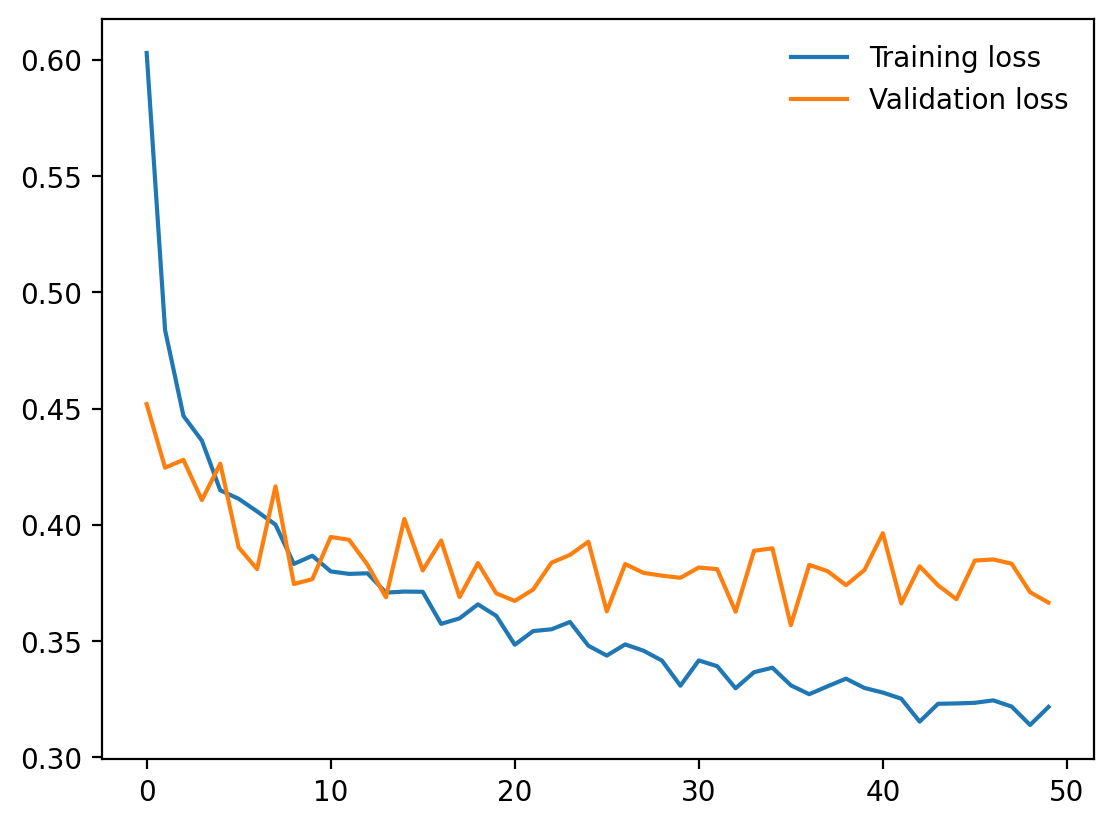

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)